In [1]:
import pandas as pd
import seaborn as sns
from seaborn.rcmod import set_style
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
p1 = pd.read_csv('/content/drive/MyDrive/3-1/p1timings10.txt')

p1.columns =['Matrix Size(ixixi)', 'NumThreads', 'Time']

p1.to_csv('/content/drive/MyDrive/3-1/p1-10.csv', index = None)

## Working for P1:

### > Initially, 1st row of Matrix 1 is read then all the columns of Matrix 2 are read
### > Later on, the remaining rows of Matrix 1 are read 
### > We choose this method of reading the matrices because it allows us to perform the multiplication with minimal time spent waiting for the input.
### > Race conditions is dealt by each thread accessing different part of input file(s)
*Threading: We divide the matrix(s) by number of thread(s) and assign each thread to a different part of the matrix*

*Shared memories: P1 creates shared memories for Matrix 1, Matrix 2, counters for Matrix 1 & 2*

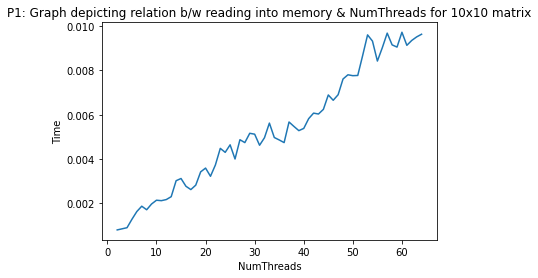

In [3]:
p1_graph = sns.lineplot(x = 'NumThreads',y = 'Time', data = p1)

sns.set(rc = {'figure.figsize':(15, 15)})
sns.set_style('dark')
plt.title('P1: Graph depicting relation b/w reading into memory & NumThreads for 10x10 matrix')
plt.savefig('/content/drive/MyDrive/3-1/p1-10.png', dpi = 300, bbox_inches = 'tight')

In [4]:
p1 = pd.read_csv('/content/drive/MyDrive/3-1/p1timings100.txt')

p1.columns =['Matrix Size(ixixi)', 'NumThreads', 'Time']

p1.to_csv('/content/drive/MyDrive/3-1/p1-100.csv', index = None)

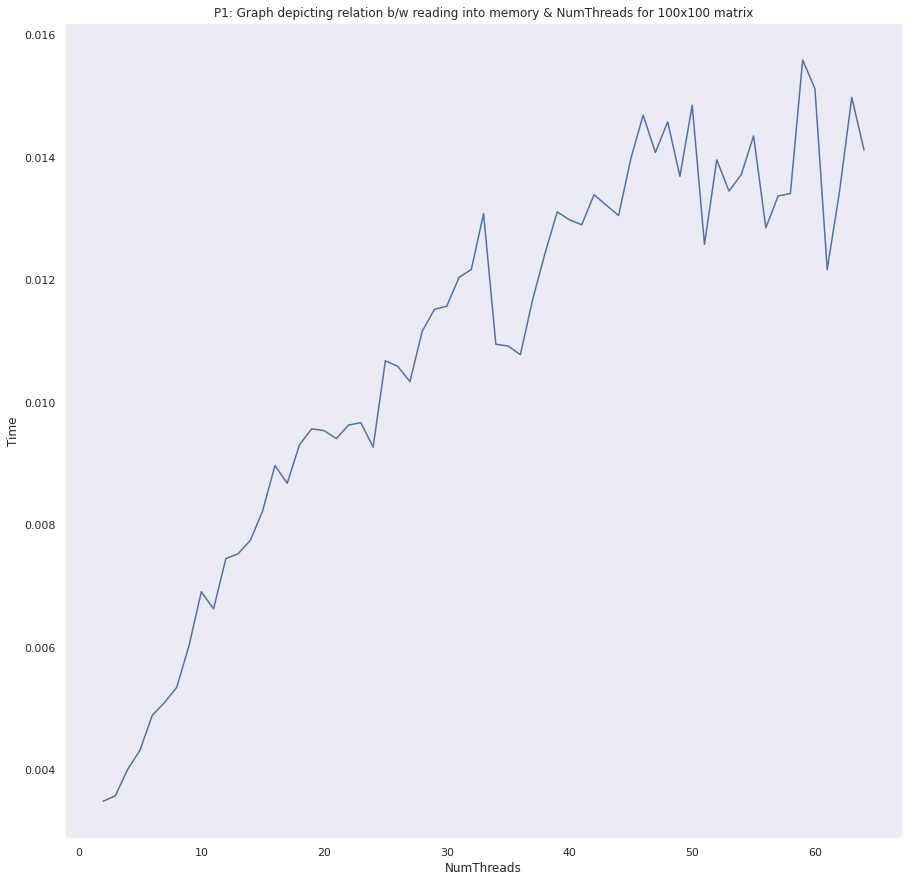

In [5]:
p1_graph = sns.lineplot(x = 'NumThreads',y = 'Time', data = p1)

sns.set(rc = {'figure.figsize':(15, 15)})
sns.set_style('dark')
plt.title('P1: Graph depicting relation b/w reading into memory & NumThreads for 100x100 matrix')
plt.savefig('/content/drive/MyDrive/3-1/p1-100.png', dpi = 300, bbox_inches = 'tight')

## Working for P2:

### > we start off by creating an output matrix for P2 and initialize its values to 0
### > We then access the shared memories to get information from P1
### > Then we copy the shared memory into a global variable so that it doesnt get affected during multithreading leading to ambigous situations.
### > We multiply the first row of M1 with all the columns of M2. If M2 is read only partially then we multilpy only part of the row with the column and multiply the remaining in the next cycle
### > Then we multiply the remaining rows of M1 with the fully read columns of M2. This time there is a possiblilty that the rows of M1 are not fully read so we have accommodations for that.
### > We use multithreading in the above steps whenever we have to multiply a row * column. We created a struct that hold values important to the thread runner function such as output matrix indices, indices for M1 and M2, and number of elements to be multiplied.


In [12]:
p2 = pd.read_csv('/content/drive/MyDrive/3-1/p2timings10.txt')

p2.columns =['Matrix Size(ixixi)', 'NumThreads', 'Time']

p2.to_csv('/content/drive/MyDrive/3-1/p2-10.csv', index = None)

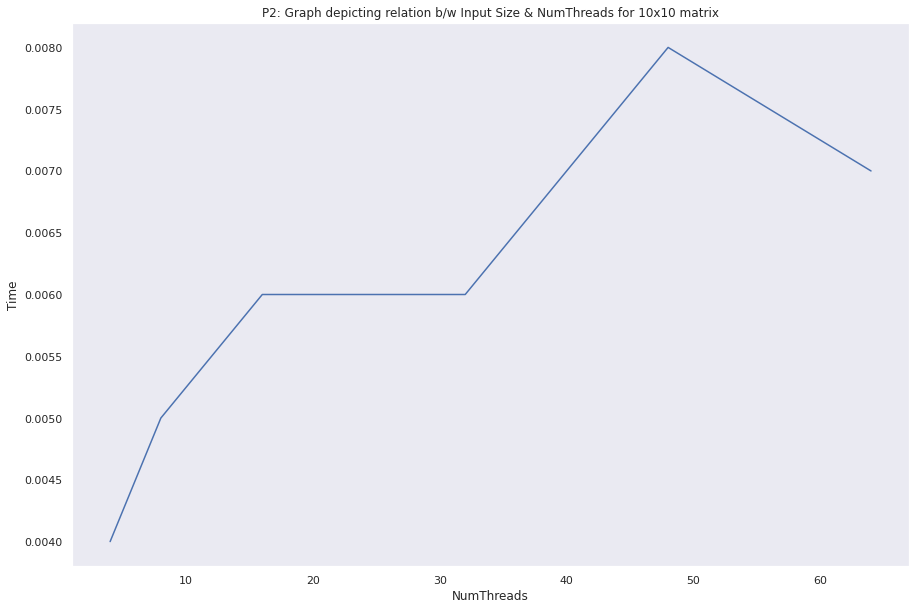

In [13]:
p2_graph = sns.lineplot(x = 'NumThreads',y = 'Time', data = p2)

sns.set(rc = {'figure.figsize':(15, 10)})
sns.set_style('dark')
plt.title('P2: Graph depicting relation b/w Input Size & NumThreads for 10x10 matrix')
plt.savefig('/content/drive/MyDrive/3-1/p2-10.png', dpi = 300, bbox_inches = 'tight')

In [14]:
p2 = pd.read_csv('/content/drive/MyDrive/3-1/p2timings100.txt')

p2.columns =['Matrix Size(ixixi)', 'NumThreads', 'Time']

p2.to_csv('/content/drive/MyDrive/3-1/p2-100.csv', index = None)

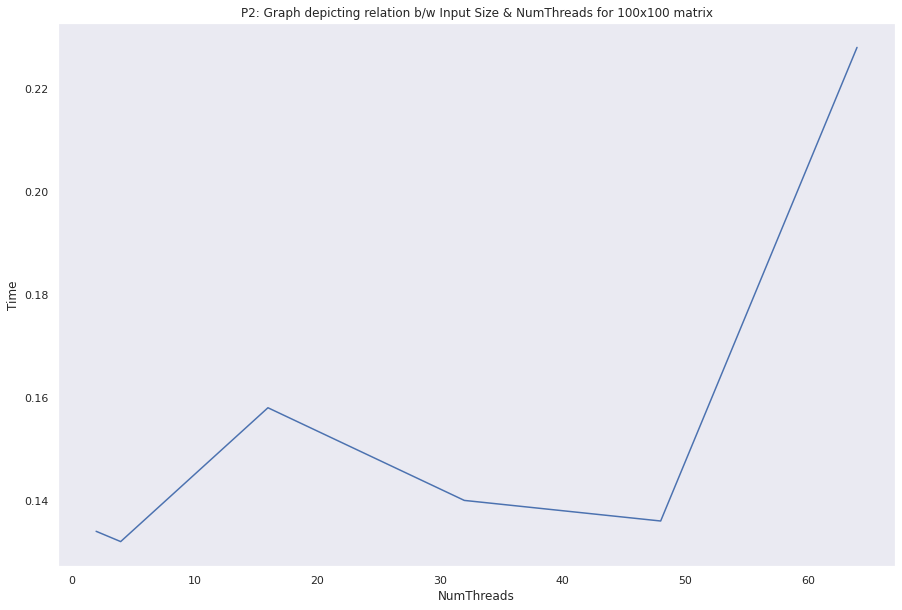

In [15]:
p2_graph = sns.lineplot(x = 'NumThreads',y = 'Time', data = p2)

sns.set(rc = {'figure.figsize':(15, 10)})
sns.set_style('dark')
plt.title('P2: Graph depicting relation b/w Input Size & NumThreads for 100x100 matrix')
plt.savefig('/content/drive/MyDrive/3-1/p2-100.png', dpi = 300, bbox_inches = 'tight')

## Turnaround Time vs Workload Size for 1ms



In [16]:
tat_10 = pd.read_csv('/content/drive/MyDrive/3-1/turnaroundvsworkload10x10x10.txt',names=['Matrix Size', 'Threads', 'Turnaround Time'])
tat_100 = pd.read_csv('/content/drive/MyDrive/3-1/turnaroundvsworkload100x100x100.txt',names=['Matrix Size', 'Threads', 'Turnaround Time'])
tat_200 = pd.read_csv('/content/drive/MyDrive/3-1/turnaroundvsworkload200x200x200.txt',names=['Matrix Size', 'Threads', 'Turnaround Time'])
tat_500 = pd.read_csv('/content/drive/MyDrive/3-1/turnaroundvsworkload500x500x500.txt',names=['Matrix Size', 'Threads', 'Turnaround Time'])


all_tat = [tat_10, tat_100, tat_200, tat_500]
for tat in all_tat:
    tat.columns = ['Workload Size', 'Threads', 'Turnaround Time']

# Give all df's common column names
for tat in all_tat:
    tat.columns = ['Workload Size', 'Threads', 'Turnaround Time']
pd.concat(all_tat).reset_index(drop=True)
all_tat = np.array(all_tat)

In [17]:
all_tat = all_tat.squeeze()
all_tat = pd.DataFrame(all_tat, columns = ['Workload Size', 'Threads', 'Turnaround Time'])
all_tat.columns = ['Workload Size', 'Threads', 'Turnaround Time']

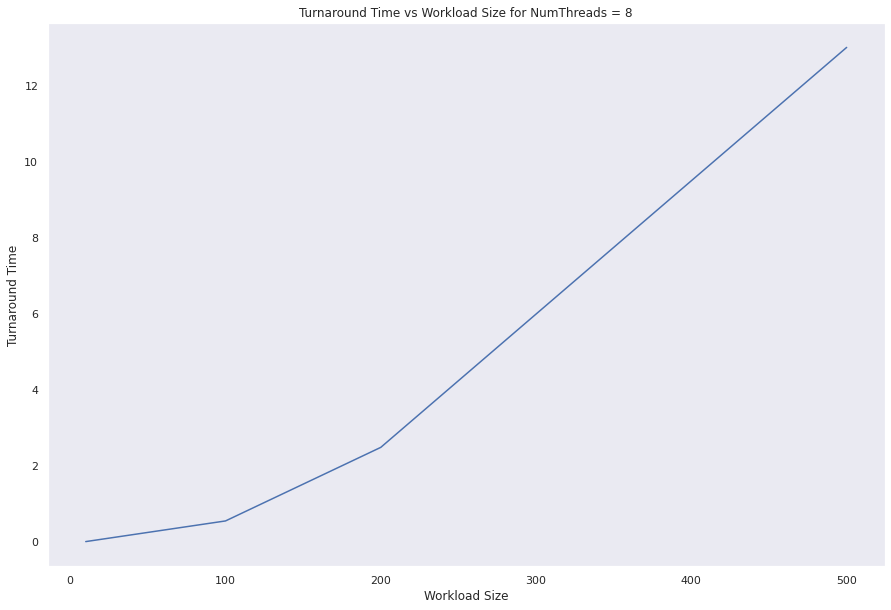

In [18]:
all_tat.to_csv('/content/drive/MyDrive/3-1/tat_1ms.csv')

tat_graph = sns.lineplot(x = 'Workload Size',y = 'Turnaround Time', data = all_tat)

sns.set(rc = {'figure.figsize':(15, 10)})
sns.set_style('dark')
plt.title('Turnaround Time vs Workload Size for NumThreads = 8')
plt.savefig('/content/drive/MyDrive/3-1/tat_1ms.png', dpi = 300, bbox_inches = 'tight')


In [20]:
tat_10 = pd.read_csv('/content/drive/MyDrive/3-1/2msturnaroundvsworkload10x10x10.txt',names=['Matrix Size', 'Threads', 'Turnaround Time'])
tat_100 = pd.read_csv('/content/drive/MyDrive/3-1/2msturnaroundvsworkload100x100x100.txt',names=['Matrix Size', 'Threads', 'Turnaround Time'])
tat_200 = pd.read_csv('/content/drive/MyDrive/3-1/2msturnaroundvsworkload200x200x200.txt',names=['Matrix Size', 'Threads', 'Turnaround Time'])
tat_500 = pd.read_csv('/content/drive/MyDrive/3-1/2msturnaroundvsworkload500x500x500.txt',names=['Matrix Size', 'Threads', 'Turnaround Time'])

# tat = pd.DataFrame()
# tat = tat.append(tat_10)
# tat = tat.append(tat_100)
# tat = tat.append(tat_200)
# tat = tat.append(tat_500)
# tat = tat.append(tat_1000)

all_tat = [tat_10, tat_100, tat_200, tat_500]
for tat in all_tat:
    tat.columns = ['Workload Size', 'Threads', 'Turnaround Time']

# Give all df's common column names
for tat in all_tat:
    tat.columns = ['Workload Size', 'Threads', 'Turnaround Time']
pd.concat(all_tat).reset_index(drop=True)
all_tat = np.array(all_tat)

In [21]:
all_tat = all_tat.squeeze()
all_tat = pd.DataFrame(all_tat, columns = ['Workload Size', 'Threads', 'Turnaround Time'])
all_tat.columns = ['Workload Size', 'Threads', 'Turnaround Time']

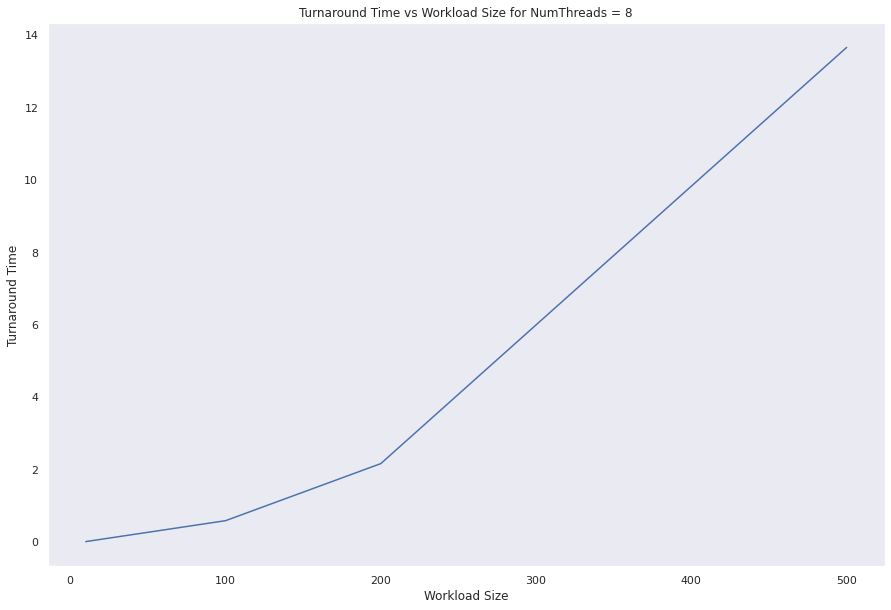

In [22]:
all_tat.to_csv('/content/drive/MyDrive/3-1/tat_2ms.csv')

tat_graph = sns.lineplot(x = 'Workload Size',y = 'Turnaround Time', data = all_tat)

sns.set(rc = {'figure.figsize':(15, 10)})
sns.set_style('dark')
plt.title('Turnaround Time vs Workload Size for NumThreads = 8')
plt.savefig('/content/drive/MyDrive/3-1/tat_2ms.png', dpi = 300, bbox_inches = 'tight')

## Waiting Time vs Workload Size for 1ms 

In [37]:
wt_10 = pd.read_csv('/content/drive/MyDrive/3-1/waiting_time10.txt',names=['Workload Size', 'Waiting Time'])
wt_50 = pd.read_csv('/content/drive/MyDrive/3-1/waiting_time50.txt',names=['Workload Size', 'Waiting Time'])
wt_100 = pd.read_csv('/content/drive/MyDrive/3-1/waiting_time100.txt',names=['Workload Size', 'Waiting Time'])
wt_200 = pd.read_csv('/content/drive/MyDrive/3-1/waiting_time200.txt',names=['Workload Size', 'Waiting Time'])


all_wt = [wt_10, wt_50, wt_100, wt_200]
for wt in all_wt:
    wt.columns = ['Workload Size', 'Waiting Time']

# Give all df's common column names
for wt in all_wt:
    wt.columns = ['Workload Size', 'Waiting Time']
pd.concat(all_wt).reset_index(drop=True)
all_wt = np.array(all_wt)

In [38]:
all_wt = all_wt.squeeze()
all_wt = pd.DataFrame(all_wt, columns = ['Workload Size', 'Waiting Time'])
all_wt.columns = ['Workload Size', 'Waiting Time']

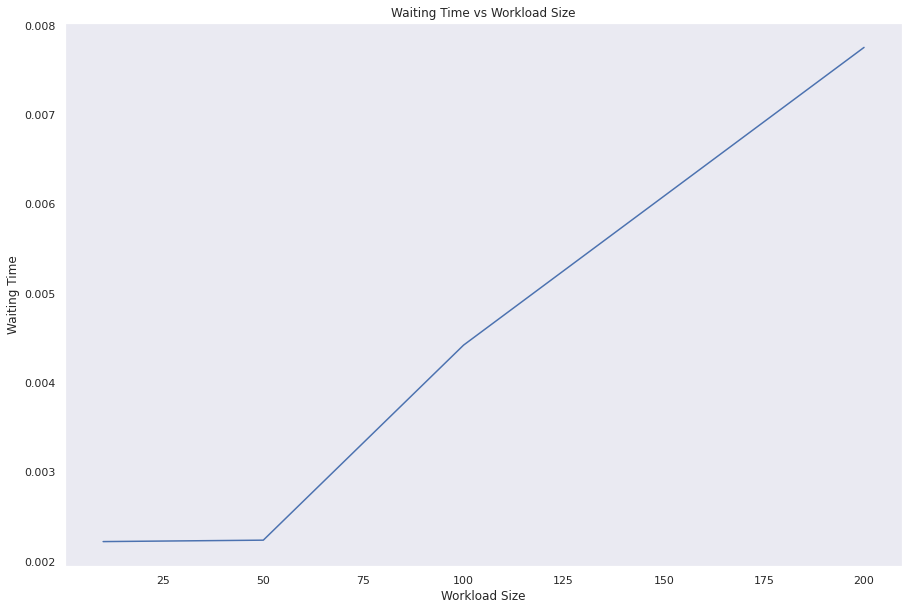

In [39]:
all_wt.to_csv('/content/drive/MyDrive/3-1/wt_1ms.csv')

wt_graph = sns.lineplot(x = 'Workload Size',y = 'Waiting Time', data = all_wt)

sns.set(rc = {'figure.figsize':(15, 10)})
sns.set_style('dark')
plt.title('Waiting Time vs Workload Size')
plt.savefig('/content/drive/MyDrive/3-1/wt_1ms.png', dpi = 300, bbox_inches = 'tight')

## Waiting Time vs Workload Size for 2ms

In [41]:
wt_10 = pd.read_csv('/content/drive/MyDrive/3-1/2waiting_time10.txt',names=['Workload Size', 'Waiting Time'])
wt_50 = pd.read_csv('/content/drive/MyDrive/3-1/2waiting_time50.txt',names=['Workload Size', 'Waiting Time'])
wt_100 = pd.read_csv('/content/drive/MyDrive/3-1/2waiting_time100.txt',names=['Workload Size', 'Waiting Time'])
wt_200 = pd.read_csv('/content/drive/MyDrive/3-1/2waiting_time200.txt',names=['Workload Size', 'Waiting Time'])


all_wt = [wt_10, wt_50, wt_100, wt_200]
for wt in all_wt:
    wt.columns = ['Workload Size', 'Waiting Time']

# Give all df's common column names
for wt in all_wt:
    wt.columns = ['Workload Size', 'Waiting Time']
pd.concat(all_wt).reset_index(drop=True)
all_wt = np.array(all_wt)

In [42]:
all_wt = all_wt.squeeze()
all_wt = pd.DataFrame(all_wt, columns = ['Workload Size', 'Waiting Time'])
all_wt.columns = ['Workload Size', 'Waiting Time']

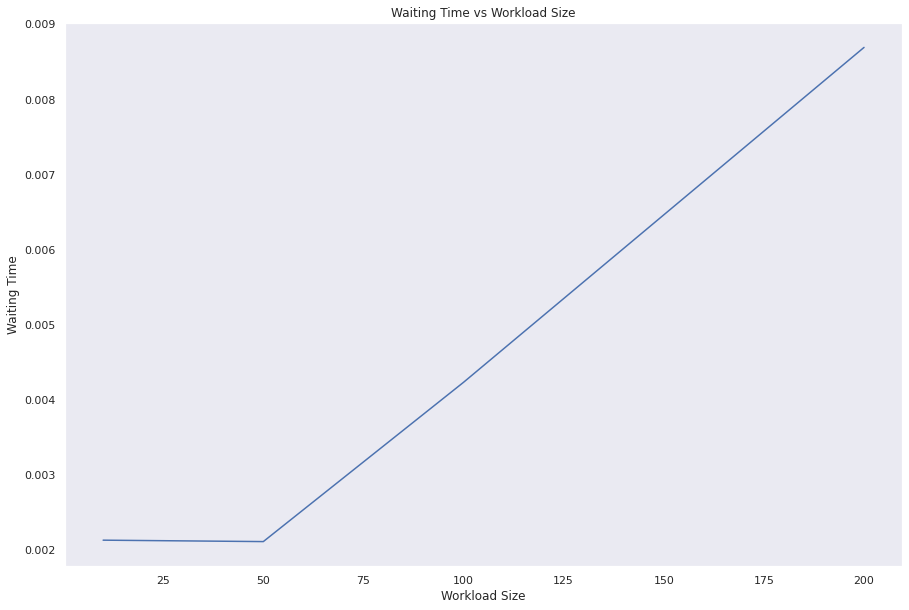

In [43]:
all_wt.to_csv('/content/drive/MyDrive/3-1/wt_2ms.csv')

wt_graph = sns.lineplot(x = 'Workload Size',y = 'Waiting Time', data = all_wt)

sns.set(rc = {'figure.figsize':(15, 10)})
sns.set_style('dark')
plt.title('Waiting Time vs Workload Size')
plt.savefig('/content/drive/MyDrive/3-1/wt_2ms.png', dpi = 300, bbox_inches = 'tight')